In [1]:
import pandas as pd

data_path = "results/table_g2.3_T0.7_a0.0_m8.0_i80.0_r0.7_e1000.0.csv"
data = pd.read_csv(data_path)

data.head()

,nH,red_chi_squared,gamma,power_norm_fake,power_norm_fit,temp,disk_norm_fake,disk_norm_fit,error_disk_norm,d,d_fit,error_d,frac_uncert,med_frac_uncert
0,0.5,0.595968,2.279739,11.822351,9.996593,0.705342,6665.634098,6457.918586,-207.715512,1.0,1.015955,0.015955,0.015955,0.078659
1,0.5,0.577371,2.147921,5.254378,3.437598,0.708186,2962.504043,2842.682057,-119.821986,1.5,1.531287,0.031287,0.020858,0.127753
2,0.5,0.569618,2.014206,2.955588,1.453246,0.712459,1666.408524,1537.278088,-129.130436,2.0,2.082306,0.082306,0.041153,0.178983
3,0.5,0.559711,2.062940,1.891576,0.869812,0.713405,1066.501456,967.989640,-98.511815,2.5,2.624131,0.124131,0.049652,0.243590
4,0.5,0.549423,2.090725,1.313595,0.588087,0.712241,740.626011,654.091029,-86.534982,3.0,3.192289,0.192289,0.064096,0.305715


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where 'frac_uncert' might be NaN to avoid issues in plotting
data_clean = data.dropna(subset=['frac_uncert'])
data_clean = data[data['frac_uncert']<100]

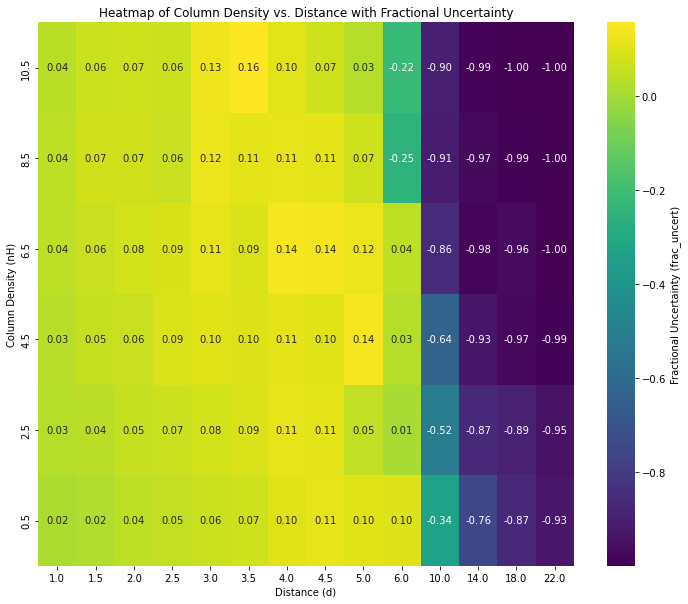

In [3]:
import seaborn as sns

# Creating a pivot table for the heatmap
pivot_table = data_clean.pivot_table(index='nH', columns='d', values='frac_uncert', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Fractional Uncertainty (frac_uncert)'})
heatmap.set_title('Heatmap of Column Density vs. Distance with Fractional Uncertainty')
heatmap.set_xlabel('Distance (d)')
heatmap.set_ylabel('Column Density (nH)')
heatmap.invert_yaxis()
plt.show()


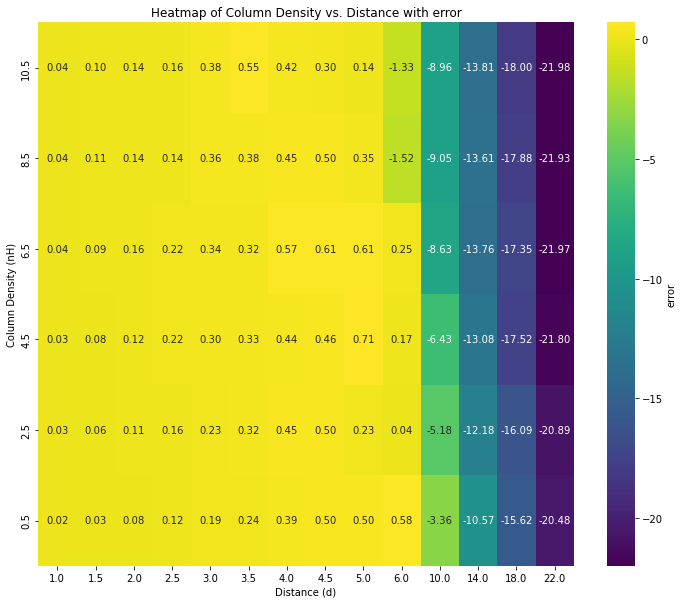

In [5]:
# Creating a pivot table for the heatmap
pivot_table = data_clean.pivot_table(index='nH', columns='d', values='error_d', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'error'})
heatmap.set_title('Heatmap of Column Density vs. Distance with error')
heatmap.set_xlabel('Distance (d)')
heatmap.set_ylabel('Column Density (nH)')
heatmap.invert_yaxis()
plt.show()
